In [1]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

data1Path = r'../dataset/data2a.txt'
data1Label = r'../dataset/data2alabel.txt'

dataCoords = np.loadtxt(data1Path)
dataLabels = np.loadtxt(data1Label)

In [2]:
# Make a data structure which is easier to work with
# for shuffling. 
# Also, notice we change the data labels from {0, 1} to {-1, +1}
data = list(zip(dataCoords, 2*dataLabels-1))
shuffled_data = shuffle(data)

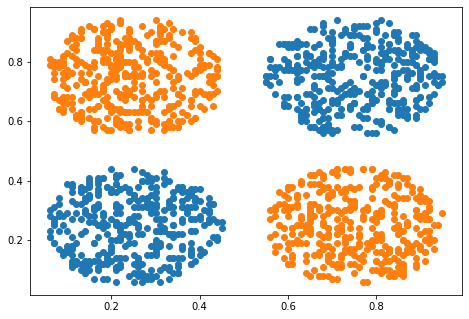

In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

In [4]:
from IPython.display import Image

# Loss function Two-Qubit

Loss is calculated with a simple two-qubit gate. First, the data is embedded into Rx rotation with pi/4 rotation of Ry and Rz. The parameterized quantum circuit is placed after the embedding. We used same structure of the circuit1 from the paper to check the convergence.

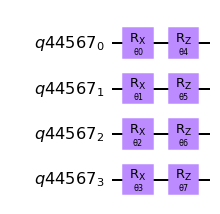

In [18]:
from circuits import *
from qiskit.circuit import Parameter

#circuit 1
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
qc=circuit1(qc,qr,theta,1,0)
qc.draw('mpl')

In [17]:
#load the simulation functcions from the quantumcircuit.py file

from quantumcircuit import *

#location,label,param,[circuit#,layer]
loss_qubitF([0.5,0.5],-1,[0,0,0,-5,0,0,0,0],[0,1])


2

## [SPSA method](https://en.wikipedia.org/wiki/Simultaneous_perturbation_stochastic_approximation)

SPSA is an algorithm used in numerical optimization.

Consider a loss function $L(\mathbf{x})$. In order to optimize $L$, SPSA iteratively optimizes the parameters of the loss function according to the following update rule:

$$\mathbf{y}_{n+1} = \mathbf{y}_{n} - a_{n}\widehat{\Delta L}_{n}(\mathbf{y}_{n}),$$

where $\widehat{\Delta L}_{n}(\mathbf{y}_{n}))$ is an estimate of the gradient at $\mathbf{y}_{n}$.

How SPSA calculates that gradient is by using a finite-difference rule on random perturbations of component of the parameter vector.
    $$\left( \widehat{\Delta L}_{n}(\mathbf{y}_{n}))\right)_{j} = \frac{L(\mathbf{y}_{n} + c_{n}\boldsymbol{\Delta}_{n}) - L(\mathbf{y}_{n} - c_{n}\boldsymbol{\Delta}_{n}) }{c_{n}\left(\boldsymbol{\Delta}_{n}\right)_{j}}$$
    
That is at each iteration, SPSA generates a random perturbation $\boldsymbol{\Delta}_{n}$, and does a finite-difference rule with that perturbation.

In order for the algorithm to converge, the random perturbation $\boldsymbol{\Delta}_{n}$ and finite-difference coefficients $c_{n}$ must satisfy certain properties (see the Wikipedia article linked to in the title). Importantly $c_{n}$ must tend to 0 as $n$ increases, and the size of the random fluctuations $\boldsymbol{\Delta}_{n}$ must also be bounded.

According to the wikipedia article, the coefficients $a_{n}$ and $c_{n}$ should look something like

$$c_{n} = \frac{c}{n^\gamma}~~\text{and}~~a_{n} = \frac{a}{n}.$$

In [16]:
#load the SPSA optimizer from the optimizer.py file
from optimizer import *

# Test the convergence of 100 data point

To have sanity check, we take 100 data and run the optimization.

In [31]:
c = 1
a = 1

# Do the updates
lossList = []
coeffsList = []
paramsList = []
accuracyList = []

np.random.seed(2)
currentParams = pi*np.random.uniform(size=8)
for j in range(300):      
    
    cj = c/(j+1)**(1/3)
    aj = a/(j+1)

    
    # Grab a subset of the data for minibatching
    #np.random.seed(j)
    np.random.seed(2)
    #data_ixs = np.random.choice(len(shuffled_data), size=len(shuffled_data))
    data_ixs = np.random.choice(len(data), size=100)
    
    # Evaluate the loss over that subset
    # We include a regularization term at the end 
    L = lambda x: np.sum([loss_qubitF(data[j][0],data[j][1],x,[0,1]) for j in data_ixs])/len(data_ixs) 
    
    lossList.append(L(currentParams))
    coeffsList.append((cj, aj))
    paramsList.append(currentParams)
    accuracyList.append(np.sum([predict_qubitF(data[j][0],currentParams,[0,1]) ==data[j][1] for j in data_ixs])/len(data_ixs))
    print(j,"th iteration L=",lossList[-1],"Accuracy =",accuracyList[-1])
    currentParams = SPSA_update(L, currentParams, aj, cj)     

0 th iteration L= 0.26 Accuracy = 0.82
1 th iteration L= 0.2 Accuracy = 0.91
2 th iteration L= 0.06 Accuracy = 0.86
3 th iteration L= 0.1 Accuracy = 0.96
4 th iteration L= 0.06 Accuracy = 0.91
5 th iteration L= 0.08 Accuracy = 0.89
6 th iteration L= 0.06 Accuracy = 0.89
7 th iteration L= 0.06 Accuracy = 0.92
8 th iteration L= 0.06 Accuracy = 0.94
9 th iteration L= 0.08 Accuracy = 0.86
10 th iteration L= 0.04 Accuracy = 0.93
11 th iteration L= 0.1 Accuracy = 0.9
12 th iteration L= 0.06 Accuracy = 0.92
13 th iteration L= 0.06 Accuracy = 0.91
14 th iteration L= 0.06 Accuracy = 0.91
15 th iteration L= 0.1 Accuracy = 0.89
16 th iteration L= 0.06 Accuracy = 0.86
17 th iteration L= 0.04 Accuracy = 0.87
18 th iteration L= 0.1 Accuracy = 0.92
19 th iteration L= 0.06 Accuracy = 0.89
20 th iteration L= 0.08 Accuracy = 0.88
21 th iteration L= 0.08 Accuracy = 0.89
22 th iteration L= 0.08 Accuracy = 0.93
23 th iteration L= 0.08 Accuracy = 0.93
24 th iteration L= 0.08 Accuracy = 0.9
25 th iteration L

204 th iteration L= 0.06 Accuracy = 0.9
205 th iteration L= 0.1 Accuracy = 0.91
206 th iteration L= 0.06 Accuracy = 0.87
207 th iteration L= 0.06 Accuracy = 0.91
208 th iteration L= 0.06 Accuracy = 0.93
209 th iteration L= 0.08 Accuracy = 0.94
210 th iteration L= 0.06 Accuracy = 0.94
211 th iteration L= 0.06 Accuracy = 0.9
212 th iteration L= 0.06 Accuracy = 0.9
213 th iteration L= 0.08 Accuracy = 0.97
214 th iteration L= 0.06 Accuracy = 0.86
215 th iteration L= 0.08 Accuracy = 0.93
216 th iteration L= 0.06 Accuracy = 0.88
217 th iteration L= 0.06 Accuracy = 0.9
218 th iteration L= 0.08 Accuracy = 0.84
219 th iteration L= 0.06 Accuracy = 0.85
220 th iteration L= 0.08 Accuracy = 0.95
221 th iteration L= 0.08 Accuracy = 0.91
222 th iteration L= 0.06 Accuracy = 0.91
223 th iteration L= 0.04 Accuracy = 0.88
224 th iteration L= 0.04 Accuracy = 0.93
225 th iteration L= 0.08 Accuracy = 0.92
226 th iteration L= 0.08 Accuracy = 0.91
227 th iteration L= 0.06 Accuracy = 0.88
228 th iteration L= 0

KeyboardInterrupt: 

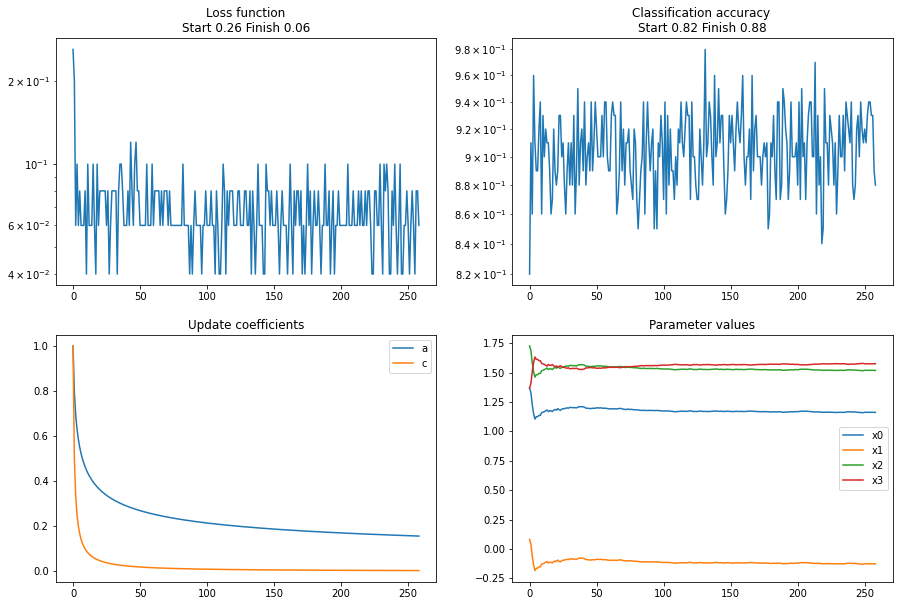

In [32]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(2, 2, 1)
ax.plot(lossList)
ax.set_title('Loss function\nStart {0} Finish {1}'.format(np.round(lossList[0], 3), np.round(lossList[-1], 3)))
ax.set_yscale('log')

ax = fig.add_subplot(2, 2, 2)
ax.plot(accuracyList)
ax.set_title('Classification accuracy \nStart {0} Finish {1}'.format(np.round(accuracyList[0], 3), np.round(accuracyList[-1], 3)))
ax.set_yscale('log')

ax = fig.add_subplot(2, 2, 3)
ax.plot([c[0] for c in coeffsList], label='a')
ax.plot([c[1] for c in coeffsList], label='c')
ax.legend(loc=0)
ax.set_title('Update coefficients')

ax = fig.add_subplot(2, 2, 4)
for j in range(4):
    ax.plot([X[j] for X in paramsList], label='x{0}'.format(j))
ax.legend(loc=0)
ax.set_title('Parameter values')
ax.legend(loc=0)

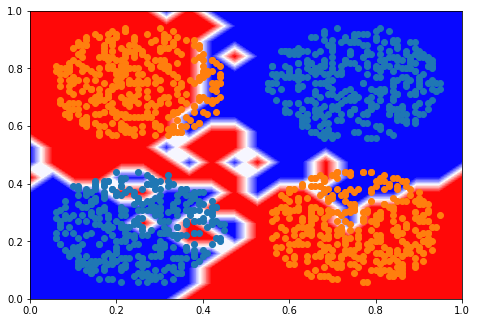

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

X = np.linspace(0, 1, num=20)
Z = np.zeros((len(X), len(X)))

# Contour map
for j in range(len(X)):
    for k in range(len(X)):
        # Fill Z with the labels (numerical values)
        # the inner loop goes over the columns of Z,
        # which corresponds to sweeping x-values
        # Therefore, the role of j,k is flipped in the signature
        Z[j, k] = predict_qubitF( np.array([X[k], X[j]]),currentParams,[0,1])
        
ax.contourf(X, X, Z, cmap='bwr', levels=30)

# Different data and circuit

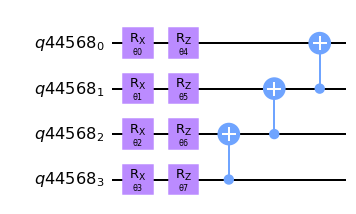

In [19]:
from circuits import *
from qiskit.circuit import Parameter

#circuit 1
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
qc=circuit2(qc,qr,theta,1,0)
qc.draw('mpl')

In [20]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

data1Path = r'../dataset/data1a.txt'
data1Label = r'../dataset/data1alabel.txt'

dataCoords = np.loadtxt(data1Path)
dataLabels = np.loadtxt(data1Label)

In [21]:
# Make a data structure which is easier to work with
# for shuffling. 
# Also, notice we change the data labels from {0, 1} to {-1, +1}
data = list(zip(dataCoords, 2*dataLabels-1))
shuffled_data = shuffle(data)

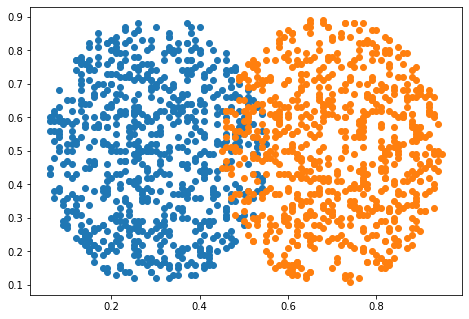

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

In [23]:
c = 1
a = 3

# Do the updates
lossList = []
coeffsList = []
paramsList = []
accuracyList = []

np.random.seed(2)
currentParams = pi*np.random.uniform(size=8)
for j in range(50):      
    
    cj = c/(j+1)**(1/3)
    aj = a/(j+1)
    
    # Grab a subset of the data for minibatching
    #np.random.seed(j)
    np.random.seed(3)
    #data_ixs = np.random.choice(len(shuffled_data), size=len(shuffled_data))
    data_ixs = np.random.choice(len(data), size=100)
    
    # Evaluate the loss over that subset
    # We include a regularization term at the end 
    L = lambda x: np.sum([loss_qubitF(data[j][0],data[j][1],x,[1,1]) for j in data_ixs])/len(data_ixs) + .05*np.linalg.norm(x[:2])**2
    
    lossList.append(L(currentParams))
    coeffsList.append((cj, aj))
    paramsList.append(currentParams)
    accuracyList.append(np.sum([predict_qubitF(data[j][0],currentParams,[1,1]) ==data[j][1] for j in data_ixs])/len(data_ixs))
    print(j,"th iteration L=",lossList[-1],"Accuracy =",accuracyList[-1])
    currentParams = SPSA_update(L, currentParams, aj, cj)     

0 th iteration L= 1.1941381245919918 Accuracy = 0.48
1 th iteration L= 1.441199567052888 Accuracy = 0.54
2 th iteration L= 1.6773133611623134 Accuracy = 0.18
3 th iteration L= 1.2691904612908476 Accuracy = 0.41
4 th iteration L= 1.148139763923409 Accuracy = 0.57
5 th iteration L= 1.1148695953752263 Accuracy = 0.52
6 th iteration L= 1.1106120781121231 Accuracy = 0.59
7 th iteration L= 1.1383037894506116 Accuracy = 0.6
8 th iteration L= 1.1398374298250165 Accuracy = 0.56
9 th iteration L= 1.1317494768897796 Accuracy = 0.58
10 th iteration L= 1.1372452338034704 Accuracy = 0.57
11 th iteration L= 1.1532509675331717 Accuracy = 0.59
12 th iteration L= 1.1434205471334133 Accuracy = 0.57
13 th iteration L= 1.124175907361222 Accuracy = 0.55
14 th iteration L= 1.0971391849697212 Accuracy = 0.55
15 th iteration L= 1.1144289145250905 Accuracy = 0.56
16 th iteration L= 1.1076112911134142 Accuracy = 0.54
17 th iteration L= 1.1469191898927487 Accuracy = 0.52
18 th iteration L= 1.1376483988511972 Accu

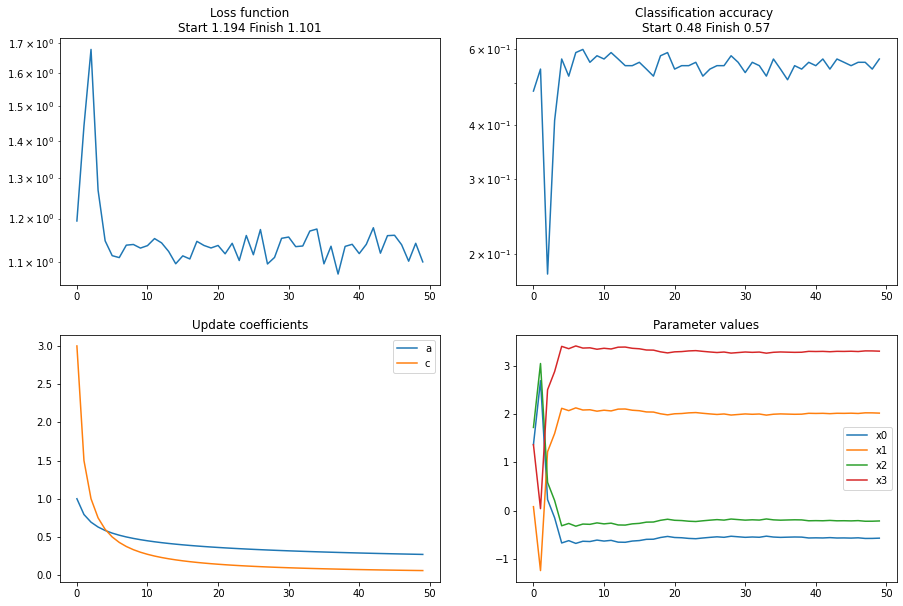

In [24]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(2, 2, 1)
ax.plot(lossList)
ax.set_title('Loss function\nStart {0} Finish {1}'.format(np.round(lossList[0], 3), np.round(lossList[-1], 3)))
ax.set_yscale('log')

ax = fig.add_subplot(2, 2, 2)
ax.plot(accuracyList)
ax.set_title('Classification accuracy \nStart {0} Finish {1}'.format(np.round(accuracyList[0], 3), np.round(accuracyList[-1], 3)))
ax.set_yscale('log')

ax = fig.add_subplot(2, 2, 3)
ax.plot([c[0] for c in coeffsList], label='a')
ax.plot([c[1] for c in coeffsList], label='c')
ax.legend(loc=0)
ax.set_title('Update coefficients')

ax = fig.add_subplot(2, 2, 4)
for j in range(4):
    ax.plot([X[j] for X in paramsList], label='x{0}'.format(j))
ax.legend(loc=0)
ax.set_title('Parameter values')
ax.legend(loc=0)

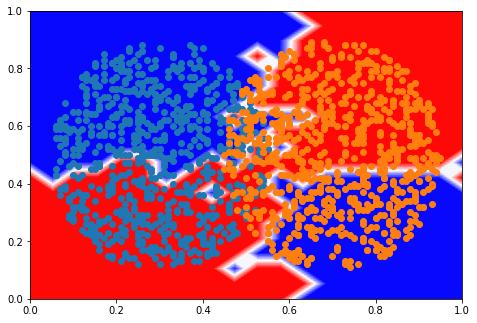

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

X = np.linspace(0, 1, num=20)
Z = np.zeros((len(X), len(X)))

# Contour map
for j in range(len(X)):
    for k in range(len(X)):
        # Fill Z with the labels (numerical values)
        # the inner loop goes over the columns of Z,
        # which corresponds to sweeping x-values
        # Therefore, the role of j,k is flipped in the signature
        Z[j, k] = predict_qubitF( np.array([X[k], X[j]]),currentParams,[1,1])
        
ax.contourf(X, X, Z, cmap='bwr', levels=30)

# Another example

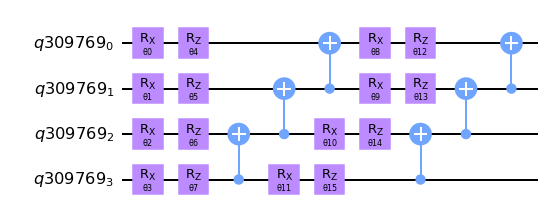

In [26]:
from circuits import *
from qiskit.circuit import Parameter

#circuit 1
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
qc=circuit2(qc,qr,theta,2,0)
qc.draw('mpl')

In [27]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

data1Path = r'../dataset/data3a.txt' 
data1Label = r'../dataset/data3alabel.txt'

dataCoords = np.loadtxt(data1Path)
dataLabels = np.loadtxt(data1Label)

In [28]:
# Make a data structure which is easier to work with
# for shuffling. 
# Also, notice we change the data labels from {0, 1} to {-1, +1}
data = list(zip(dataCoords, 2*dataLabels-1))
shuffled_data = shuffle(data)

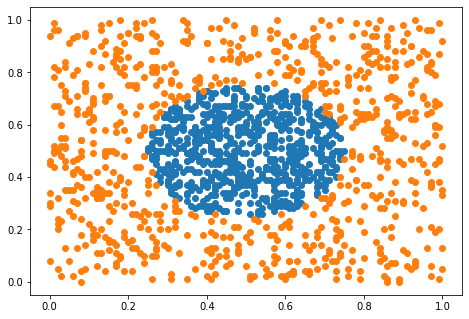

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

In [ ]:
c = 3
a = 4

# Do the updates
lossList = []
coeffsList = []
paramsList = []
accuracyList = []

np.random.seed(1)
currentParams = pi*np.random.uniform(size=8)
for j in range(50):      
    
    cj = c/(j+1)**(1/4)
    aj = a/(j+1)
    
    # Grab a subset of the data for minibatching
    #np.random.seed(j)
    np.random.seed(3)
    #data_ixs = np.random.choice(len(shuffled_data), size=len(shuffled_data))
    data_ixs = np.random.choice(len(data), size=100)
    
    # Evaluate the loss over that subset
    # We include a regularization term at the end 
    L = lambda x: np.sum([loss_qubitF(data[j][0],data[j][1],x,[1,1]) for j in data_ixs])/len(data_ixs) + .05*np.linalg.norm(x[:2])**2
    
    lossList.append(L(currentParams))
    coeffsList.append((cj, aj))
    paramsList.append(currentParams)
    accuracyList.append(np.sum([predict_qubitF(data[j][0],currentParams,[1,1]) ==data[j][1] for j in data_ixs])/len(data_ixs))
    print(j,"th iteration L=",lossList[-1],"Accuracy =",accuracyList[-1])
    currentParams = SPSA_update(L, currentParams, aj, cj)     

0 th iteration L= 1.4618706253493543 Accuracy = 0.46
1 th iteration L= 1.2614987226803285 Accuracy = 0.61
2 th iteration L= 1.281648415516392 Accuracy = 0.53
3 th iteration L= 1.2798971215253734 Accuracy = 0.56
4 th iteration L= 1.2392864845018177 Accuracy = 0.54
5 th iteration L= 1.1996739301669002 Accuracy = 0.53
6 th iteration L= 1.2197024095551778 Accuracy = 0.55
7 th iteration L= 1.2197311704055702 Accuracy = 0.57
8 th iteration L= 1.2194661118561934 Accuracy = 0.55
9 th iteration L= 1.15941933696304 Accuracy = 0.54
10 th iteration L= 1.1995409728732709 Accuracy = 0.6
11 th iteration L= 1.2197865725677302 Accuracy = 0.55
12 th iteration L= 1.179957397082164 Accuracy = 0.53
13 th iteration L= 1.1799712892941283 Accuracy = 0.54
14 th iteration L= 1.1996878808006297 Accuracy = 0.55
15 th iteration L= 1.1593585691332893 Accuracy = 0.61
16 th iteration L= 1.2391964298200058 Accuracy = 0.55
17 th iteration L= 1.2591725792313393 Accuracy = 0.53
18 th iteration L= 1.2191845603825175 Accur

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

X = np.linspace(0, 1, num=20)
Z = np.zeros((len(X), len(X)))

# Contour map
for j in range(len(X)):
    for k in range(len(X)):
        # Fill Z with the labels (numerical values)
        # the inner loop goes over the columns of Z,
        # which corresponds to sweeping x-values
        # Therefore, the role of j,k is flipped in the signature
        Z[j, k] = predict_qubitF( np.array([X[k], X[j]]),currentParams,[0,1])
        
ax.contourf(X, X, Z, cmap='bwr', levels=30)